In [1]:
import pandas as pd
confirmed_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
con = pd.read_csv(confirmed_url)
recover_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
rec = pd.read_csv(recover_url)
death_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
dea = pd.read_csv(death_url)

In [2]:
c=con[con['Country/Region']=='US'].to_numpy()
r=rec[rec['Country/Region']=='US'].to_numpy()
d=dea[dea['Country/Region']=='US'].to_numpy()

In [3]:
c,r,d

(array([[nan, 'US', 37.0902, -95.7129, 1, 1, 2, 2, 5, 5, 5, 5, 5, 7, 8, 8,
         11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 13, 13, 13,
         13, 13, 15, 15, 15, 51, 51, 57, 58, 60, 68, 74, 98, 118, 149,
         217, 262, 402, 518, 583, 959, 1281, 1663, 2179, 2727, 3499, 4632,
         6421, 7783, 13747, 19273, 25600, 33276, 43843, 53736, 65778,
         83836, 101657, 121465, 140909, 161831, 188172, 213242, 243622,
         275367, 308650, 336802, 366317, 397121, 428654, 462780, 496535,
         526396, 555313, 580619, 607670, 636350, 667592, 699706, 732197,
         758809, 784326, 811865, 840351, 869170]], dtype=object),
 array([[nan, 'US', 37.0902, -95.7129, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5,
         6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 12, 12, 12, 12,
         17, 17, 105, 121, 147, 176, 178, 178, 348, 361, 681, 869, 1072,
         2665, 5644, 7024, 8474, 9001, 9707, 14652, 1744

In [7]:
import numpy as np
Stai=[]
for i in range(4,97):
    Stai.append(sum(c[:,i]))
Star=[]
for i in range(4,97):
    Star.append(sum(r[:,i]))
Stad=[]
for i in range(4,97):
    Stad.append(sum(d[:,i]))
Sta=[]
Sta.append(Stai)
Sta.append(Star)
Sta.append(Stad)
Data=np.mat(Sta)

In [8]:
Data

matrix([[     1,      1,      2,      2,      5,      5,      5,      5,
              5,      7,      8,      8,     11,     11,     11,     11,
             11,     11,     11,     11,     12,     12,     13,     13,
             13,     13,     13,     13,     13,     13,     15,     15,
             15,     51,     51,     57,     58,     60,     68,     74,
             98,    118,    149,    217,    262,    402,    518,    583,
            959,   1281,   1663,   2179,   2727,   3499,   4632,   6421,
           7783,  13747,  19273,  25600,  33276,  43843,  53736,  65778,
          83836, 101657, 121465, 140909, 161831, 188172, 213242, 243622,
         275367, 308650, 336802, 366317, 397121, 428654, 462780, 496535,
         526396, 555313, 580619, 607670, 636350, 667592, 699706, 732197,
         758809, 784326, 811865, 840351, 869170],
        [     0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
 

In [9]:
def FEuler(V,beta,alpha,r,miu,N0):
    return V+np.mat([[-beta*V[1,0]*V[0,0]/N0],[beta*V[1,0]*V[0,0]/N0-alpha*V[1,0]],[alpha*V[1,0]-(r+miu)*V[2,0]],[r*V[2,0]],[miu*V[2,0]]])
def DFEu(D,V,beta,alpha,r,miu,N0):
    return np.mat([[1-beta*V[1,0]/N0,-beta*V[0,0]/N0,0,0,0],[beta*V[1,0]/N0,1-alpha+beta*V[0,0]/N0,0,0,0],[0,alpha,1-r-miu,0,0],[0,0,r,1,0],[0,0,miu,0,1]])*D+np.mat([[-V[2,0]*V[0,0]/N0,0,0,0],[V[2,0]*V[0,0]/N0,-V[1,0],0,0],[0,V[1,0],-V[2,0],-V[2,0]],[0,0,V[2,0],0],[0,0,0,V[2,0]]])

In [11]:
def Jf(V,Data,T):
    S=0
    for i in range(T):
        S=S+np.multiply(V[2:,i]-Data[:,i+1],V[2:,i]-Data[:,i+1]).sum()
    return (S/T)**0.5
def DJ(V,D,Data,T,J):
    S=np.mat([0,0,0,0])
    for i in range(T):
        S=S+((V[2:,i]-Data[:,i+1]).T)*D[2:,:]
    S=S/(T*J)
    return S,(np.multiply(S,S).sum())**0.5

In [263]:
I0,R0,D0,N0=1,0,0,3.28*10**8,
eta,epsi=0.001,0.01

In [299]:
k,E0=0,460
beta,alpha,r,miu=0.3,0.196,0.005,0.003
while k<20000:
    V=np.mat([[(N0-E0-I0-R0-D0)*(1-beta*E0/N0)],[(1-alpha)*E0+beta*E0*(N0-E0-I0-R0-D0)/N0],[alpha*E0-(r+miu)*I0],[r*I0],[miu*I0]])
    D=np.mat([[-(N0-E0-I0-R0-D0)*E0/N0,0,0,0],[E0*(N0-E0-I0-R0-D0)/N0,-E0,0,0],[0,E0,-I0,-I0],[0,0,I0,0],[0,0,0,I0]])
    T=90
    Vnew=V
    for i in range(1,T):
        D=DFEu(D,Vnew,beta,alpha,r,miu,N0)
        Vnew=FEuler(Vnew,beta,alpha,r,miu,N0)
        V=np.hstack((V,Vnew))
    J=Jf(V,Data,T)
    if k==0 or J<Jmin:
        Jmin=J
        b_,a_,r_,m_=beta,alpha,r,miu
        Vmin=V
    k=k+1
    dJ,mse=DJ(V,D,Data,T,J)
    dJ,mse=DJ(V,D,Data,T,J)
    beta=beta-eta/(mse+epsi)*dJ[0,0]
    alpha=alpha-eta/(mse+epsi)*dJ[0,1]
    r=r-eta/(mse+epsi)*dJ[0,2]
    miu=miu-eta/(mse+epsi)*dJ[0,3]

In [304]:
Jmin

41060.80506163046

In [307]:
b_,a_,r_,m_

(0.28324297372279783,
 0.2050511078425829,
 0.005756572028909568,
 0.003719098718996454)

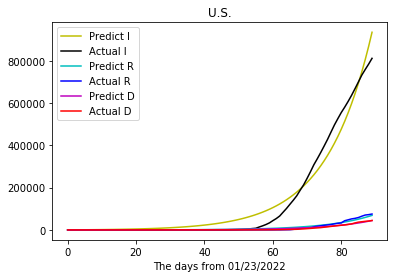

In [471]:
import matplotlib.pyplot as plt
plt.xlabel('The days from 01/23/2022')
plt.plot(range(T),Vmin[2,:].tolist()[0],'y')
plt.plot(range(T),Stai[1:91],'k')
plt.plot(range(T),Vmin[3,:].tolist()[0],'c')
plt.plot(range(T),Star[1:91],'b')
plt.plot(range(T),Vmin[4,:].tolist()[0],'m')
plt.plot(range(T),Stad[1:91],'r')
plt.legend(['Predict I', 'Actual I','Predict R', 'Actual R', 'Predict D', 'Actual D'])
plt.title('U.S.')
plt.show()

In [309]:
beta,alpha,r,miu=b_,a_,r_,m_

In [310]:
 for i in range(T,200):
        Vnew=FEuler(Vnew,beta,alpha,r,miu,N0)
        V=np.hstack((V,Vnew))

In [321]:
for i in range(200,250):
    Vnew=FEuler(Vnew,beta,alpha,r,miu,N0)
    V=np.hstack((V,Vnew))

In [322]:
V.shape

(5, 250)

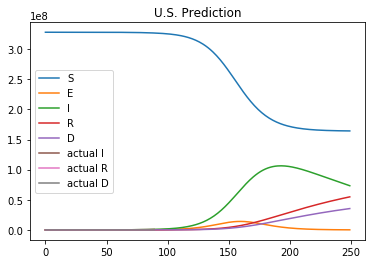

In [472]:
plt.plot(range(250),V[0,:].tolist()[0])
plt.plot(range(250),V[1,:].tolist()[0])
plt.plot(range(250),V[2,:].tolist()[0])
plt.plot(range(250),V[3,:].tolist()[0])
plt.plot(range(250),V[4,:].tolist()[0])
plt.plot(range(T),Stai[1:91])
plt.plot(range(T),Star[1:91])
plt.plot(range(T),Stad[1:91])
plt.title('U.S. Prediction')
plt.legend(['S','E','I','R','D','actual I','actual R','actual D'])
plt.show()

In [455]:
StaV=Data[:,:90]
SIu=StaV
SIl=StaV
sv=np.mat([[N0-Vmin[1,89]-Data[0,90]-Data[1,90]-Data[2,90]],[Vmin[1,89]],[Data[0,90]],[Data[1,90]],[Data[2,90]]])
cov=np.mat(np.zeros((5,5)))
cov[0,0],cov[1,1]=(0.1*Vmin[1,89])**2,(0.1*Vmin[1,89])**2

In [456]:
cov

matrix([[1.57745709e+09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 1.57745709e+09, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]])

In [457]:
for t in range(90,250):
    svnew=np.mat([[sv[0,0]-beta*(cov[0,1]+sv[0,0]*sv[1,0])/N0],[beta*(cov[0,1]+sv[0,0]*sv[1,0])/N0+(1-alpha)*sv[1,0]],[alpha*sv[1,0]+(1-r-miu)*sv[2,0]],[sv[3,0]+r*sv[2,0]],[sv[4,0]+miu*sv[2,0]]])
    StaV=np.hstack((StaV,svnew[2:]))
    covS_SE=sv[1,0]*cov[0,0]+sv[0,0]*cov[0,1]
    covE_SE=sv[0,0]*cov[1,1]+sv[1,0]*cov[0,1]
    covI_SE=sv[0,0]*cov[1,2]+sv[1,0]*cov[0,2]
    covR_SE=sv[0,0]*cov[1,3]+sv[1,0]*cov[0,3]
    covD_SE=sv[0,0]*cov[1,4]+sv[1,0]*cov[0,4]
    covSE_SE=sv[0,0]**2*cov[1,1]+2*cov[0,1]*sv[0,0]*sv[1,0]+sv[1,0]**2*cov[0,0]+cov[0,0]*cov[1,1]+cov[0,1]**2
    cov=np.mat([[cov[0,0]-2*beta/N0*covS_SE+beta**2/N0**2*covSE_SE, beta/N0*covS_SE+(1-alpha)*cov[0,1]-beta**2/N0**2*covSE_SE-beta*(1-alpha)/N0*covE_SE, alpha*cov[0,1]+(1-r-miu)*cov[0,2]-alpha*beta/N0*covE_SE-(1-r-miu)*beta/N0*covI_SE, cov[0,3]+r*cov[0,2]-beta/N0*covR_SE-r*beta/N0*covI_SE, cov[0,4]+miu*cov[0,2]-beta/N0*covD_SE-miu*beta/N0*covI_SE],
                [beta/N0*covS_SE+(1-alpha)*cov[0,1]-beta**2/N0**2*covSE_SE-beta*(1-alpha)/N0*covE_SE, beta**2/N0**2*covSE_SE+2*(1-alpha)*beta/N0*covE_SE+(1-alpha)**2*cov[1,1], alpha*beta/N0*covE_SE+(1-r-miu)*beta/N0*covI_SE+alpha*(1-alpha)*cov[1,1]+(1-alpha)*(1-r-miu)*cov[1,2], beta/N0*covR_SE+r*beta/N0*covI_SE+(1-alpha)*cov[1,3]+(1-alpha)*r*cov[1,2], beta/N0*covD_SE+miu*beta/N0*covI_SE+(1-alpha)*cov[1,4]+(1-alpha)*miu*cov[1,2]],
                [alpha*cov[0,1]+(1-r-miu)*cov[0,2]-alpha*beta/N0*covE_SE-(1-r-miu)*beta/N0*covI_SE, alpha*beta/N0*covE_SE+(1-r-miu)*beta/N0*covI_SE+alpha*(1-alpha)*cov[1,1]+(1-alpha)*(1-r-miu)*cov[1,2], alpha**2*cov[1,1]+2*alpha*(1-r-miu)*cov[1,2]+(1-r-miu)**2*cov[2,2], alpha*cov[1,3]+alpha*r*cov[1,2]+(1-r-miu)*cov[2,3]+r*(1-r-miu)*cov[2,2], alpha*cov[1,4]+alpha*miu*cov[1,2]+(1-r-miu)*cov[2,4]+miu*(1-r-miu)*cov[2,2]],
                [cov[0,3]+r*cov[0,2]-beta/N0*covR_SE-r*beta/N0*covI_SE, beta/N0*covR_SE+r*beta/N0*covI_SE+(1-alpha)*cov[1,3]+(1-alpha)*r*cov[1,2], alpha*cov[1,3]+alpha*r*cov[1,2]+(1-r-miu)*cov[2,3]+r*(1-r-miu)*cov[2,2], cov[3,3]+2*r*cov[2,3]+r**2*cov[2,2], cov[3,4]+miu*cov[2,3]+r*cov[2,4]+r*miu*cov[2,2]],
                [cov[0,4]+miu*cov[0,2]-beta/N0*covD_SE-miu*beta/N0*covI_SE, beta/N0*covD_SE+miu*beta/N0*covI_SE+(1-alpha)*cov[1,4]+(1-alpha)*miu*cov[1,2], alpha*cov[1,4]+alpha*miu*cov[1,2]+(1-r-miu)*cov[2,4]+miu*(1-r-miu)*cov[2,2], cov[3,4]+miu*cov[2,3]+r*cov[2,4]+r*miu*cov[2,2], cov[4,4]+2*miu*cov[2,4]+miu**2*cov[2,2]]])
    SIu=np.hstack((SIu,svnew[2:]+3*np.mat([[cov[2,2]**0.5],[cov[3,3]**0.5],[cov[4,4]**0.5]])))
    SIl=np.hstack((SIl,svnew[2:]-3*np.mat([[cov[2,2]**0.5],[cov[3,3]**0.5],[cov[4,4]**0.5]])))
    sv=svnew

In [415]:
sv[1,0]

397172.1397229847

In [394]:
svnew

matrix([[3.26559274e+08],
        [4.27772063e+05],
        [8.85612622e+05],
        [7.98775594e+04],
        [4.74634061e+04]])

In [458]:
cov

matrix([[ 1.57411459e+10,  1.29663109e+09,  9.97454600e+10,
         -7.44665199e+10, -4.81099407e+10],
        [ 1.29663109e+09,  1.16014811e+08,  9.06376324e+09,
         -6.63113181e+09, -4.28411799e+09],
        [ 9.97454600e+10,  9.06376324e+09,  7.10242095e+11,
         -5.17515075e+11, -3.34346490e+11],
        [-7.44665199e+10, -6.63113181e+09, -5.17515075e+11,
          3.79237381e+11,  2.45010616e+11],
        [-4.81099407e+10, -4.28411799e+09, -3.34346490e+11,
          2.45010616e+11,  1.58291890e+11]])

In [437]:
sum(abs(cov))

matrix([[ 5964660.04529592,   531595.02981801, 41757244.41030876,
         30552671.24179935, 19738900.14867406]])

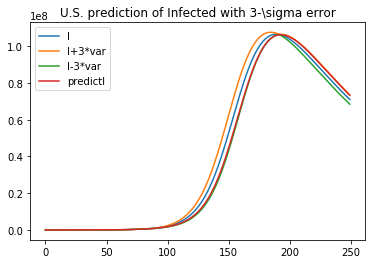

In [473]:
plt.plot(range(250),StaV[0,:].tolist()[0])
plt.plot(range(250),SIu[0,:].tolist()[0])
plt.plot(range(250),SIl[0,:].tolist()[0])
plt.plot(range(250),V[2,:].tolist()[0])
plt.legend(['I','I+3*var','I-3*var','predictI'])
plt.title('U.S. prediction of Infected with 3-\sigma error')
plt.show()

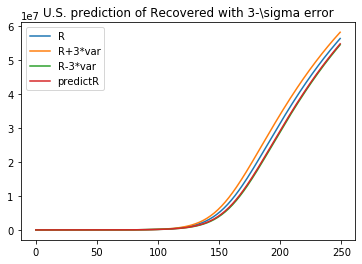

In [474]:
plt.plot(range(250),StaV[1,:].tolist()[0])
plt.plot(range(250),SIu[1,:].tolist()[0])
plt.plot(range(250),SIl[1,:].tolist()[0])
plt.plot(range(250),V[3,:].tolist()[0])
plt.legend(['R','R+3*var','R-3*var','predictR'])
plt.title('U.S. prediction of Recovered with 3-\sigma error')
plt.show()

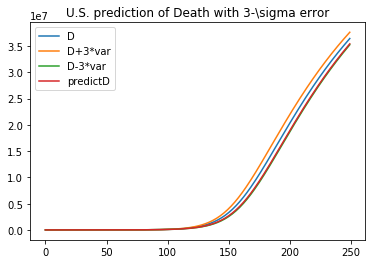

In [475]:
plt.plot(range(250),StaV[2,:].tolist()[0])
plt.plot(range(250),SIu[2,:].tolist()[0])
plt.plot(range(250),SIl[2,:].tolist()[0])
plt.plot(range(250),V[4,:].tolist()[0])
plt.legend(['D','D+3*var','D-3*var','predictD'])
plt.title('U.S. prediction of Death with 3-\sigma error')
plt.show()